In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [2]:
ser = Service('C:/Users/jhjh3/class/datasalon-master/02_data_class/chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service=ser)

In [3]:
url='https://www.instagram.com/'
driver.get(url)
time.sleep(3)

In [4]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return(url)

In [5]:
word = '제주도맛집' 
url = insta_searching(word)
url


'https://www.instagram.com/explore/tags/제주도맛집'

In [6]:
word = '제주도맛집' 
url = insta_searching(word)
driver.get(url)
time.sleep(5)

In [7]:
# content,  tags, like, place
from selenium.webdriver.common.by import By

# first = driver.find_element_by_css_selector('div._9AhHO')
first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
first.click()

In [9]:
from selenium.webdriver.common.by import By

def select_first(driver):
    # first = driver.find_element_by_css_selector('div._9AhHO')
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)
    
select_first(driver)

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

soup

In [12]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC', content)

content

'.💚애월 초록달과자점💚동화감성 낭낭한 애월 디저트카페!😍눈길을 사로잡는 신비로운 외관에서 인생샷 건지고커피와 어울리는 꿀맛탱 디저트도 먹자~👍👍@같이 갈 사람 소환@주소: 제주시 애월읍 납읍로2길 35-4..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플'

In [13]:
import re 

tags = re.findall(r'#\w+', content)
tags

['#제주맛집',
 '#제주도맛집',
 '#제주공항근처맛집',
 '#제주시맛집',
 '#애월맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#서귀포맛집',
 '#산방산맛집',
 '#신제주맛집',
 '#제주시청맛집',
 '#제주애월맛집',
 '#월정리맛집',
 '#제주여행',
 '#제주핫플']

In [14]:
import re 

tags = re.findall(r'#[^\s#,\\]+', content)
tags

['#제주맛집',
 '#제주도맛집',
 '#제주공항근처맛집',
 '#제주시맛집',
 '#애월맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#서귀포맛집',
 '#산방산맛집',
 '#신제주맛집',
 '#제주시청맛집',
 '#제주애월맛집',
 '#월정리맛집',
 '#제주여행',
 '#제주핫플']

In [15]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][0:10]
date

'2022-01-19'

In [16]:
like = soup.select('div.Nm9Fw > a > span')[0].text
like = soup.select('a.zV_Nj > span')[0].text
like

'1,125'

In [17]:
place = soup.select('a.O4GlU')
place = unicodedata.normalize('NFC', content)
place

'.💚애월 초록달과자점💚동화감성 낭낭한 애월 디저트카페!😍눈길을 사로잡는 신비로운 외관에서 인생샷 건지고커피와 어울리는 꿀맛탱 디저트도 먹자~👍👍@같이 갈 사람 소환@주소: 제주시 애월읍 납읍로2길 35-4..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플'

In [18]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ''
       
    try:
        tags = re.findall(r'#[^\s#,\\]+', content)
    except:
        tags = ''
        
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][0:10]
    
    try:
        like = soup.select('div.Nm9Fw > a > span')[0].text
    except:
        like = 0
        
    try:
        place = soup.select('a.O4GlU')
    except:
        place=''
        
    data = [content, date, like, place, tags]
    
    return(data)
    

In [19]:
my_list = get_content(driver)
my_list

['.💚애월 초록달과자점💚동화감성 낭낭한 애월 디저트카페!😍눈길을 사로잡는 신비로운 외관에서 인생샷 건지고커피와 어울리는 꿀맛탱 디저트도 먹자~👍👍@같이 갈 사람 소환@주소: 제주시 애월읍 납읍로2길 35-4..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
 '2022-01-19',
 '1,125',
 [],
 ['#제주맛집',
  '#제주도맛집',
  '#제주공항근처맛집',
  '#제주시맛집',
  '#애월맛집',
  '#중문맛집',
  '#제주공항맛집',
  '#서귀포맛집',
  '#산방산맛집',
  '#신제주맛집',
  '#제주시청맛집',
  '#제주애월맛집',
  '#월정리맛집',
  '#제주여행',
  '#제주핫플']]

In [20]:
right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
right.click()

In [21]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)
    
move_next(driver)

In [22]:
target = 3

for i in range(target):

    def get_content(driver):
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
    
        try:
            content = soup.select('div.C4VMK > span')[0].text
            content = unicodedata.normalize('NFC', content)
        except:
            contnet = ''
    
        try:
            tags = re.findall(r'#[^\s#,\\]+', content)
        except:
            tags = ''
        
        date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
        try:
            place = soup.select('a.O4GlU')
        except:
            place=''
        
        data = [content, date, like, place, tags]
        
        return(data)
    
    
    def move_next(driver):
        right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
        right.click()
        time.sleep(3)
    
    move_next(driver)
    
    
    

In [23]:
def insta_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    
#     target = n
    results = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
            
        except:
            time.sleep(2)
            move_next(driver)
            
    return(results)


In [36]:
# driver = webdriver.Chrome(service = ser)

# driver.get('https://www.instagram.com/')
# time.sleep(2)

def insta_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
#    target = n
    results = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return(results)
    

In [37]:
result_1 = insta_crawling('제주도맛집', 20)

In [39]:
len(result_1)


20

In [40]:
result_df = pd.DataFrame(result_1)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']

result_df.head()

,content,date,like,place,tags
0,".❤제주 ""바이못""❤그냥 카페와는 다른 갤러리같은 공간에서바이못에서만 느낄수 있는 ...",2022-01-19,"1,125",[],"[#제주맛집, #제주도맛집, #제주공항근처맛집, #제주시맛집, #애월맛집, #중문맛..."
1,.💚애월 초록달과자점💚동화감성 낭낭한 애월 디저트카페!😍눈길을 사로잡는 신비로운 외...,2022-01-19,"1,125",[],"[#제주맛집, #제주도맛집, #제주공항근처맛집, #제주시맛집, #애월맛집, #중문맛..."
2,.❄️제주 1100고지❄️겨울 제주여행에서 빠질 수 없는 코스!⛄눈꽃이 만개한 도로...,2022-01-20,"1,125",[],"[#제주맛집, #제주도맛집, #제주공항근처맛집, #제주시맛집, #애월맛집, #중문맛..."
3,💚제주도 세졸귀 디저트 모음9💚감성+비주얼까지 몽땅 잡은 디저트 다 있다;;@@솔찌...,2022-01-19,"1,125",[],"[#몽그레, #아꼬운제주, #제주하멜, #당당, #한라산과자점, #우무, #어드래커..."
4,"가성비갑👍제주통갈치구이, 전복구이, 갈치조림, 보말국 등 제주대표 음식들을 가장 가...",2022-01-19,"1,125",[],"[#제주시맛집, #동문시장맛집, #제주공항근처맛집, #용두암맛집, #탑동맛집, #동..."


In [ ]:
result_df.to_excel('./newfiles/new_craling.xlsx', index = False)

In [43]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = 'C:/Users/jhjh3/class/datasalon-master/02_data_class/5_Jeju_Hotplace/files/' + fname
    
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    


In [44]:
jeju_insta_df.shape

(12780, 5)

In [45]:
jeju_insta_df.drop_duplicates(subset= ['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [ ]:
jeju_insta_df.to_excel('./newfiles/1_crawling_raw.xlsx', index = False)

In [46]:
raw_total = jeju_insta_df.copy()

In [47]:
raw_total.columns
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [48]:
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [49]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
        
tags_total

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [50]:
# type(tags_total)

from collections import Counter
Counter(tags_total)

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1454,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

In [51]:
# pd.Series(tags_total).value_counts()
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
        
raw_total['tags'][1].str[2:-2]

1    #함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo',...
1    #제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주...
1    #함스타푸드_속초청초수물회✔️속초핫플레이스해삼전복물회✔️40.000₩.대한민국', ...
1    #동백군락지', '#제주위미동백군락지', '#제주', '#위미', '#동백', '#...
Name: tags, dtype: object

In [52]:
# type(tags_total)

from collections import Counter
tag_counts = Counter(tags_total)
tag_counts

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1454,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

In [53]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [54]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#제주일상',
'#여행','#여행스타그램','#눈썹문신', '#서귀포반영구', '#daily', '#제주반영구']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected = Counter(tag_total_selected)        
tag_total_selected.most_common(50)        

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주도관광', 440),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주속눈썹', 397),
 ('#먹스타그램', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343)]

### 바 플랏 시각화

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns


rc('font', family = "malgun gothic")

In [ ]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))  
tag_count_df.columns = ['tags', 'counts']
tag_count_df.head()

# brank 지우기
tag_count_df['tags'].replace('', None, inplace = True)
tag_count_df['tags']
tag_count_df.dropna(subset = ['tags'], inplace = True)

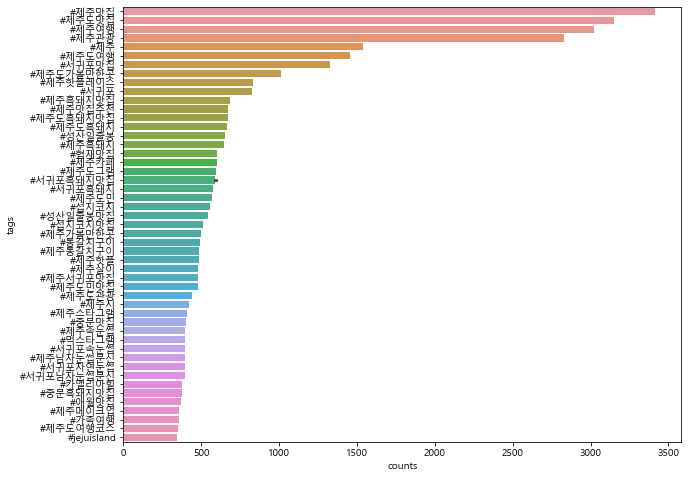

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts', y = 'tags',
           data = tag_count_df)
plt.show()

In [ ]:
! pip install wordcloud==1.4.1

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\jhjh3\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-xjtum6xh\\wordcloud_d1b456589daa479389a00f9391067eab\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-xjtum6xh\\wordcloud_d1b456589daa479389a00f9391067eab\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-wheel-ryv48nxy'
       cwd: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-xjtum6xh\wordcloud_d1b456589daa479389a00f9391067eab\
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  c


  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'



    Complete output (16 lines):
    running install
    running build
    running build_py
    creating build
    creating build\lib.win-amd64-3.9
    creating build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
    copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
    running build_ext
    building 'wordcloud.query_integral_image' extension
    error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ER

In [ ]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# 예제 5-23 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/2_tag-wordcloud.png')  

### 지도시각화 하기

In [ ]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [ ]:
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
# raw_total.shape

In [ ]:
location_counts = raw_total['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [ ]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',